In [1]:
import numpy as np
import pandas as pd
from gravity import Gravity, Production, Attraction, Doubly, BaseGravity
from entropy import Unconstrained, ProductionConstrained, AttractionConstrained, DoublyConstrained
import statsmodels.formula.api as smf
from statsmodels.api import families
import matplotlib.pyplot as plt
%pylab inline

import time                                                

def timeit(method):

    def timed(*args, **kw):
        ts = time.time()
        result = method(*args, **kw)
        te = time.time()
        elapsed = te-ts

        #print '%2.8f sec' % \
              #(elapsed)
        return result, elapsed

    return timed

Populating the interactive namespace from numpy and matplotlib


In [2]:
@timeit
def gravity(f ,o, d, o_vars, d_vars, dij, cost='exp', framework='glm'):
    results = Gravity(f, o_vars, d_vars, dij, cost, framework=framework)
    return results
    
@timeit    
def production(f ,o, d, o_vars, d_vars, dij, cost='exp', framework='glm'):
    results = Production(f, o, d_vars, dij, 'exp', framework=framework)
    return results

@timeit    
def attraction(f ,o, d, o_vars, d_vars, dij, cost='exp', framework='glm'):
    results = Attraction(f, d, o_vars, dij, 'exp', framework=framework)
    return results

@timeit    
def doubly(f ,o, d, o_vars, d_vars, dij, cost='exp', framework='glm'):
    results = Doubly(f, o, d, dij, 'exp', framework=framework)
    return results



In [3]:
def sim_data(n):
    o = np.tile(np.arange(n),n)
    d = np.repeat(np.arange(n),n)
    loc_size = np.random.randint(25000,500000, n)
    o_vars = np.tile(loc_size, n)
    d_vars = np.repeat(loc_size, n)
    dij = np.random.exponential(2500, n**2)
    f = o_vars**.3*d_vars**.4*np.exp(dij*-.00005)
    o = np.reshape(o, (-1,1))
    d = np.reshape(d, (-1,1))
    o_vars = np.reshape(o_vars, (-1,1))
    d_vars = np.reshape(d_vars, (-1,1))
    dij = np.reshape(dij, (-1,1))
    f = np.reshape(f, (-1,1))
    f = f.astype(np.int64)
    return f, o, d, o_vars, d_vars, dij


In [4]:
def loop(func, start, stop, step, framework='glm'):
    results = []
    for n in np.arange(start, stop, step):
        f, o, d, o_vars, d_vars, dij = sim_data(n)
        out, elapsed = func(f, o, d, o_vars, d_vars, dij, 'exp', framework=framework)
        print out.params[-2:]
        results.append(elapsed)
    return results
    


In [6]:
glm_grav = loop(gravity, 50, 250, 50)
glm_prod = loop(production, 50, 250, 50)
glm_att = loop(attraction, 50, 250, 50)
glm_doub = loop(doubly, 50, 250, 50)

[  4.00003986e-01  -5.00062344e-05]
[  4.00000711e-01  -5.00059325e-05]
[  4.00001658e-01  -5.00061814e-05]
[  4.00001436e-01  -5.00056294e-05]
done grav
[  4.00052393e-01  -5.00055341e-05]
[  4.00047276e-01  -5.00051040e-05]
[  4.00048658e-01  -5.00059538e-05]
[  4.00048379e-01  -5.00055060e-05]
done prod
[  3.00036436e-01  -5.00048422e-05]
[  3.00034506e-01  -5.00050569e-05]
[  3.00034662e-01  -5.00057481e-05]
[  3.00033724e-01  -5.00053687e-05]
done att
[  8.75099647e+00  -5.00049372e-05]
[  8.73882480e+00  -5.00055008e-05]
[  8.94907167e+00  -5.00053340e-05]
[  7.73702314e+00  -5.00054592e-05]
done doub


In [24]:
smglm_grav = loop(gravity, 50, 250, 50, framework='sm_glm')
smglm_prod = loop(production, 50, 250, 50, framework='sm_glm')
smglm_att = loop(attraction, 50, 250, 50, framework='sm_glm')
smglm_doub = loop(doubly, 50, 250, 50, framework='sm_glm')

[  3.99999234e-01  -5.00062191e-05]
[  4.00001076e-01  -5.00062492e-05]
[  4.00001389e-01  -5.00057222e-05]
[  4.00000984e-01  -5.00059887e-05]
done grav
[  4.00048435e-01  -5.00066802e-05]
[  4.00041509e-01  -5.00050816e-05]
[  4.00046297e-01  -5.00055228e-05]
[  4.00047581e-01  -5.00056450e-05]
done prod
[  3.00034888e-01  -5.00057684e-05]
[  3.00030868e-01  -5.00052200e-05]
[  3.00034843e-01  -5.00052973e-05]
[  3.00033373e-01  -5.00056172e-05]
done att
[  8.43635482e+00  -5.00059845e-05]
[  9.10470367e+00  -5.00050012e-05]
[  8.89461190e+00  -5.00056690e-05]
[  8.15451280e+00  -5.00058664e-05]
done doub


In [28]:
x = np.arange(50, 250, 50)

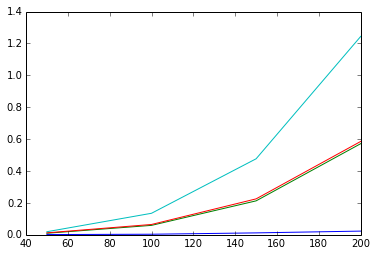

In [35]:
plt.plot(x, glm_grav, x, glm_prod, x, glm_att, x, glm_doub)

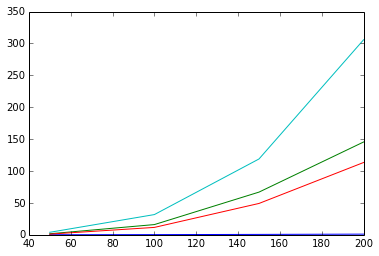

In [36]:
plt.plot(x, smglm_grav, x, smglm_prod, x, smglm_att, x, smglm_doub)